In [1]:
import numpy
from belashovplot import TiledPlot
from tqdm import tqdm
from copy import deepcopy

In [2]:
def explicit(initial:numpy.ndarray, alpha:float):
    initial = deepcopy(initial)
    x_dependence = deepcopy(initial[0])
    for i in range(1, initial.shape[0]):
        shifted_dependencies = [x_dependence[0:-2], x_dependence[1:-1], x_dependence[2:]]
        x_dependence[1:-1] += alpha*(shifted_dependencies[0] - 2*shifted_dependencies[1] + shifted_dependencies[2])
        x_dependence[0] = initial[i][0]
        x_dependence[-1] = initial[i][-1]
        initial[i] = deepcopy(x_dependence)
    return initial

In [3]:
def implicit(initial:numpy.ndarray, alpha:float):
    initial = deepcopy(initial)
    a_array = numpy.ones(initial.shape[1]) * (-alpha)
    b_array = numpy.ones(initial.shape[1]) * (1 + 2*alpha)
    c_array = numpy.ones(initial.shape[1]) * (-alpha)
    a_array[0] = 0
    c_array[-1] = 0

    d_array = deepcopy(initial[0])
    for n in range(1, initial.shape[0]): 
        alpha_array = numpy.zeros(initial.shape[1]-1)
        beta_array = numpy.zeros(initial.shape[1]-1)
        alpha_array[0] = -c_array[0] / b_array[0]
        beta_array[0] = d_array[0] / b_array[0]
        for i in range(1, initial.shape[1]-1):
            alpha_array[i] = - c_array[i] / (a_array[i]*alpha_array[i-1] + b_array[i])
            beta_array[i] = (d_array[i] - a_array[i]*beta_array[i-1]) / (a_array[i]*alpha_array[i-1] + b_array[i])
        d_array[-1] = (d_array[-1] - a_array[-1]*beta_array[-1]) / (a_array[-1]*alpha_array[-1] + b_array[-1])
        for i in reversed(range(0, initial.shape[1]-1)):
            d_array[i] = alpha_array[i]*d_array[i+1] + beta_array[i]
        initial[n] = deepcopy(d_array)
    return initial

In [4]:
def initial_field(nx:int, nt:int, T0:float=2.67, Tx0:float=0.0, Tx1:float=0.0, x0:float=0.0, x1:float=10.0, t:float=1.0):
    x_space = numpy.linspace(x0, x1, nx)
    t_space = numpy.linspace(0, t, nt)
    dx = x_space[1] - x_space[0]
    dt = t_space[1] - t_space[0]
    initial = numpy.zeros((nt, nx))
    initial[:, 0] = Tx0
    initial[:, -1] = Tx1
    initial[0] = T0 * ((x_space - 5)**2) * numpy.exp(-(x_space - 5)**2)
    return initial, dt, dx

In [5]:
def get_by_time(result:numpy.ndarray, t:float=1.0, *timings):
    dt = t / (result.shape[0] - 1)
    x_dependencies = []
    for timing in timings:
        x_dependencies.append(result[int(timing/dt)])
    return x_dependencies

# Результат для $(dx,dt) = (0.1, 0.01)$

In [6]:
time_points = (0, 0.1, 0.2, 0.3, 0.5, 1.0)
nx = 101
nt = 101
x_space = numpy.linspace(0, 10, nx)
initial, dt, dx = initial_field(nx, nt)
alpha = dt/(dx**2)
print(dx, dt, alpha)

0.1 0.01 0.9999999999999998


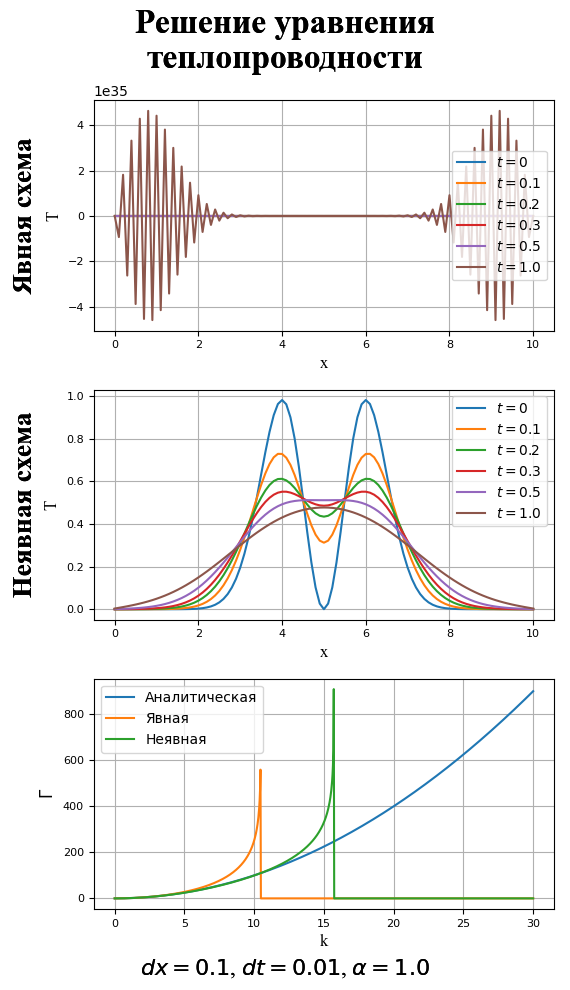

In [7]:
plot = TiledPlot(7.3, 9.7)
plot.title("Решение уравнения теплопроводности")
plot.description.bottom(f"$dx={dx}$, $dt={dt}$, $\\alpha={round(alpha, 2)}$")
plot.description.row.left("Явная схема", 0)
plot.description.row.left("Неявная схема", 1)
plot.width_to_height(2.0)

result = explicit(initial, alpha)
curves = get_by_time(result, 1.0, *time_points)
axes = plot.axes.add(0,0)
axes.grid(True)
# axes.plot(result[0])
for curve, time in zip(curves, time_points):
    axes.plot(x_space, curve, label=f"$t={round(time, 1)}$")
axes.legend()
plot.graph.label.x("x")
plot.graph.label.y("T")

result = implicit(initial, alpha)
curves = get_by_time(result, 1.0, *time_points)
axes = plot.axes.add(0,1)
axes.grid(True)
# axes.plot(result[0])
for curve, time in zip(curves, time_points):
    axes.plot(x_space, curve, label=f"$t={round(time, 1)}$")
axes.legend()
plot.graph.label.x("x")
plot.graph.label.y("T")

k_space = numpy.linspace(0, 30, 1000)
analitic_G = k_space**2
temp = 1 - 4*dt*(numpy.sin(k_space*dx/2)**2)/(dx**2)
explicit_G = -numpy.log(numpy.where(temp > 0, temp, 1))/dt
temp1 = 1 - 2*dt*(numpy.sin(k_space*dx/2)**2)/(dx**2)
temp2 = 1 + 2*dt*(numpy.sin(k_space*dx/2)**2)/(dx**2)
temp = temp1 / temp2
implicit_G = -numpy.log(numpy.where(temp > 0, temp, 1))/dt
axes = plot.axes.add(0,2)
axes.grid(True)
axes.plot(k_space, analitic_G, label='Аналитическая')
axes.plot(k_space, explicit_G, label='Явная')
axes.plot(k_space, implicit_G, label='Неявная')
axes.legend()
plot.graph.label.x("k")
plot.graph.label.y("$\Gamma$")

plot.save("../figures/HW3G1.svg")
plot.show()

# Результат для $(dx,dt) = (0.1, 0.001)$

In [8]:
time_points = (0, 0.1, 0.2, 0.3, 0.5, 1.0)
nx = 101
nt = 201
x_space = numpy.linspace(0, 10, nx)
initial, dt, dx = initial_field(nx, nt)
alpha = dt/(dx**2)
print(dx, dt, alpha)

0.1 0.005 0.4999999999999999


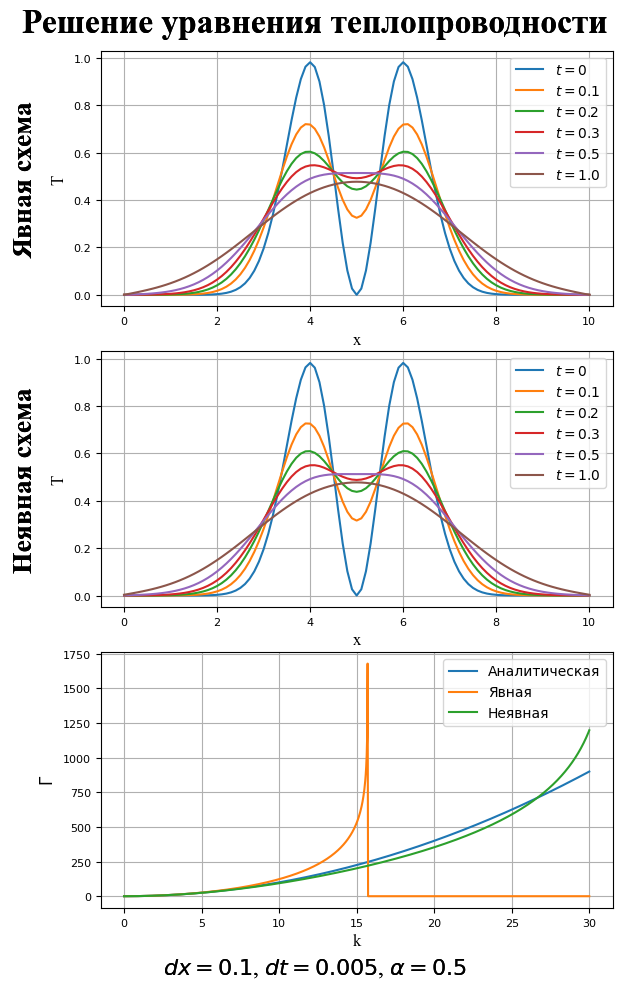

In [10]:
plot = TiledPlot(7.3, 9.7)
plot.title("Решение уравнения теплопроводности")
plot.description.bottom(f"$dx={dx}$, $dt={dt}$, $\\alpha={round(alpha, 2)}$")
plot.description.row.left("Явная схема", 0)
plot.description.row.left("Неявная схема", 1)
plot.width_to_height(2.0)

result = explicit(initial, alpha)
curves = get_by_time(result, 1.0, *time_points)
axes = plot.axes.add(0,0)
axes.grid(True)
# axes.plot(result[0])
for curve, time in zip(curves, time_points):
    axes.plot(x_space, curve, label=f"$t={round(time, 1)}$")
axes.legend()
plot.graph.label.x("x")
plot.graph.label.y("T")

result = implicit(initial, alpha)
curves = get_by_time(result, 1.0, *time_points)
axes = plot.axes.add(0,1)
axes.grid(True)
# axes.plot(result[0])
for curve, time in zip(curves, time_points):
    axes.plot(x_space, curve, label=f"$t={round(time, 1)}$")
axes.legend()
plot.graph.label.x("x")
plot.graph.label.y("T")

k_space = numpy.linspace(0, 30, 1000)
analitic_G = k_space**2
temp = 1 - 4*dt*(numpy.sin(k_space*dx/2)**2)/(dx**2)
explicit_G = -numpy.log(numpy.where(temp > 0, temp, 1))/dt
temp1 = 1 - 2*dt*(numpy.sin(k_space*dx/2)**2)/(dx**2)
temp2 = 1 + 2*dt*(numpy.sin(k_space*dx/2)**2)/(dx**2)
temp = temp1 / temp2
implicit_G = -numpy.log(numpy.where(temp > 0, temp, 1))/dt
axes = plot.axes.add(0,2)
axes.grid(True)
axes.plot(k_space, analitic_G, label='Аналитическая')
axes.plot(k_space, explicit_G, label='Явная')
axes.plot(k_space, implicit_G, label='Неявная')
axes.legend()
plot.graph.label.x("k")
plot.graph.label.y("$\Gamma$")

plot.save("../figures/HW3G2.svg")
plot.show()